Librerías necesarias:

In [19]:
import numpy as np 
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import csv
from PIL import Image
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
from sklearn.metrics import confusion_matrix
#from scipy import stats
#KERAS
import h5py
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
from keras import optimizers
from sklearn.metrics import classification_report
import collections
from keras.models import model_from_json
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, EarlyStopping
import keras.backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam
from keras.models import model_from_json

Leemos el directorio y contamos cuántas imágenes hay

In [20]:
def open_model(name):
    # load json and create model
    json_file = open('{}.json'.format(name), 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights('{}.h5'.format(name)) # load weights into new model
    print("Loaded model from disk")
    
    return loaded_model

learning_rate_file = open("lr_entrenamiento_2015-2019_QWK.txt", "r")
prev_learning_rate = float(learning_rate_file.readline())
modelo_opened = open_model("entrenamiento_2015-2019_QWK")

Loaded model from disk


In [21]:
#Función que recorta los bordes de las imágenes 
#(inspirado en  https://www.kaggle.com/ratthachat/aptos-updated-preprocessing-ben-s-cropping)
def crop_border(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mask = gray_img > 7       
    check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
    if (check_shape == 0):
        return img
    else:
        img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
        img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
        img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
        img = np.stack([img1,img2,img3],axis=-1)
    return img

2022-05-31 08:38:51.384184: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


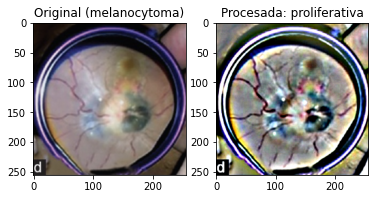

In [6]:
imatge = cv2.imread('/Users/lcasanova/Desktop/UOC-MCD/TFM/figures/proves_RD_movil/melanocytoma.png')
#imatge = cv2.imread('002c21358ce6.png')
imatge = crop_border(imatge)
imatge = cv2.resize(imatge, (256, 256),interpolation=cv2.INTER_LINEAR)
# Aplicamos GaussianBlur
blurred = cv2.blur(imatge, ksize=(int(256 / 6), int(256 / 6)))
image_blur = cv2.addWeighted(imatge, 4, cv2.GaussianBlur(imatge , (0,0) , 10) ,-4 ,128)
prova_img = modelo_opened.predict(np.reshape(image_blur,[1,256,256,3]))
pred_img_prova = np.argmax(prova_img,axis=1)
if(pred_img_prova == 0):
    pred = 'Sin RD'
if(pred_img_prova == 1):
    pred = 'RD leve'
if(pred_img_prova == 2):
    pred = 'Moderada'
if(pred_img_prova == 3):
    pred = 'Grave'
if(pred_img_prova == 4):
    pred = 'proliferativa'
    
f, axarr = plt.subplots(1,2)
axarr[0].imshow(cv2.cvtColor(imatge, cv2.COLOR_BGR2RGB))
axarr[0].title.set_text("Original (melanocytoma)")
axarr[1].imshow(cv2.cvtColor(image_blur, cv2.COLOR_BGR2RGB))
axarr[1].title.set_text(f"Procesada: {pred}")


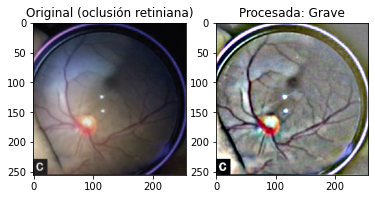

In [7]:
imatge = cv2.imread('/Users/lcasanova/Desktop/UOC-MCD/TFM/figures/proves_RD_movil/blanqueamiento_oclusion_retiniana.png')
imatge = crop_border(imatge)
imatge = cv2.resize(imatge, (256, 256),interpolation=cv2.INTER_LINEAR)
# Aplicamos GaussianBlur
blurred = cv2.blur(imatge, ksize=(int(256 / 6), int(256 / 6)))
image_blur = cv2.addWeighted(imatge, 4, cv2.GaussianBlur(imatge , (0,0) , 10) ,-4 ,128)
prova_img = modelo_opened.predict(np.reshape(image_blur,[1,256,256,3]))
pred_img_prova = np.argmax(prova_img,axis=1)
if(pred_img_prova == 0):
    pred = 'Sin RD'
if(pred_img_prova == 1):
    pred = 'RD leve'
if(pred_img_prova == 2):
    pred = 'Moderada'
if(pred_img_prova == 3):
    pred = 'Grave'
if(pred_img_prova == 4):
    pred = 'proliferativa'
    
f, axarr = plt.subplots(1,2)
axarr[0].imshow(cv2.cvtColor(imatge, cv2.COLOR_BGR2RGB))
axarr[0].title.set_text("Original (oclusión retiniana)")
axarr[1].imshow(cv2.cvtColor(image_blur, cv2.COLOR_BGR2RGB))
axarr[1].title.set_text(f"Procesada: {pred}")


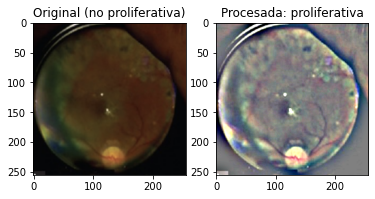

In [8]:
imatge = cv2.imread('/Users/lcasanova/Desktop/UOC-MCD/TFM/figures/proves_RD_movil/noproliferativa.png')
imatge = crop_border(imatge)
imatge = cv2.resize(imatge, (256, 256),interpolation=cv2.INTER_LINEAR)
# Aplicamos GaussianBlur
blurred = cv2.blur(imatge, ksize=(int(256 / 6), int(256 / 6)))
image_blur = cv2.addWeighted(imatge, 4, cv2.GaussianBlur(imatge , (0,0) , 10) ,-4 ,128)
prova_img = modelo_opened.predict(np.reshape(image_blur,[1,256,256,3]))
pred_img_prova = np.argmax(prova_img,axis=1)
if(pred_img_prova == 0):
    pred = 'Sin RD'
if(pred_img_prova == 1):
    pred = 'RD leve'
if(pred_img_prova == 2):
    pred = 'Moderada'
if(pred_img_prova == 3):
    pred = 'Grave'
if(pred_img_prova == 4):
    pred = 'proliferativa'
    
f, axarr = plt.subplots(1,2)
axarr[0].imshow(cv2.cvtColor(imatge, cv2.COLOR_BGR2RGB))
axarr[0].title.set_text("Original (no proliferativa)")
axarr[1].imshow(cv2.cvtColor(image_blur, cv2.COLOR_BGR2RGB))
axarr[1].title.set_text(f"Procesada: {pred}")


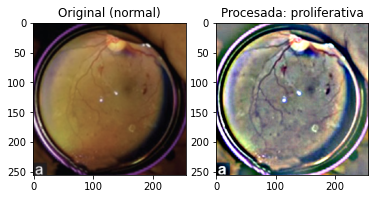

In [9]:
imatge = cv2.imread('/Users/lcasanova/Desktop/UOC-MCD/TFM/figures/proves_RD_movil/normal.png')
imatge = crop_border(imatge)
imatge = cv2.resize(imatge, (256, 256),interpolation=cv2.INTER_LINEAR)
# Aplicamos GaussianBlur
blurred = cv2.blur(imatge, ksize=(int(256 / 6), int(256 / 6)))
image_blur = cv2.addWeighted(imatge, 4, cv2.GaussianBlur(imatge , (0,0) , 10) ,-4 ,128)
prova_img = modelo_opened.predict(np.reshape(image_blur,[1,256,256,3]))
pred_img_prova = np.argmax(prova_img,axis=1)
if(pred_img_prova == 0):
    pred = 'Sin RD'
if(pred_img_prova == 1):
    pred = 'RD leve'
if(pred_img_prova == 2):
    pred = 'Moderada'
if(pred_img_prova == 3):
    pred = 'Grave'
if(pred_img_prova == 4):
    pred = 'proliferativa'
    
f, axarr = plt.subplots(1,2)
axarr[0].imshow(cv2.cvtColor(imatge, cv2.COLOR_BGR2RGB))
axarr[0].title.set_text("Original (normal)")
axarr[1].imshow(cv2.cvtColor(image_blur, cv2.COLOR_BGR2RGB))
axarr[1].title.set_text(f"Procesada: {pred}")

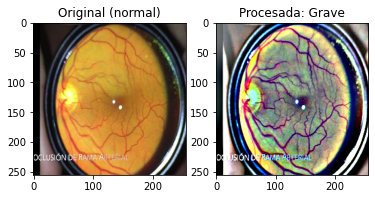

In [10]:
imatge = cv2.imread('/Users/lcasanova/Desktop/UOC-MCD/TFM/figures/proves_RD_movil/maxresdefault.jpeg')
imatge = crop_border(imatge)
imatge = cv2.resize(imatge, (256, 256),interpolation=cv2.INTER_LINEAR)
# Aplicamos GaussianBlur
blurred = cv2.blur(imatge, ksize=(int(256 / 6), int(256 / 6)))
image_blur = cv2.addWeighted(imatge, 4, cv2.GaussianBlur(imatge , (0,0) , 10) ,-4 ,128)
prova_img = modelo_opened.predict(np.reshape(image_blur,[1,256,256,3]))
pred_img_prova = np.argmax(prova_img,axis=1)
if(pred_img_prova == 0):
    pred = 'Sin RD'
if(pred_img_prova == 1):
    pred = 'RD leve'
if(pred_img_prova == 2):
    pred = 'Moderada'
if(pred_img_prova == 3):
    pred = 'Grave'
if(pred_img_prova == 4):
    pred = 'proliferativa'
    
f, axarr = plt.subplots(1,2)
axarr[0].imshow(cv2.cvtColor(imatge, cv2.COLOR_BGR2RGB))
axarr[0].title.set_text("Original (normal)")
axarr[1].imshow(cv2.cvtColor(image_blur, cv2.COLOR_BGR2RGB))
axarr[1].title.set_text(f"Procesada: {pred}")

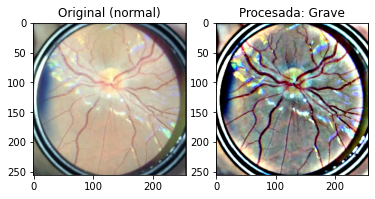

In [11]:
imatge = cv2.imread('/Users/lcasanova/Desktop/UOC-MCD/TFM/figures/proves_RD_movil/untitled.png')
imatge = crop_border(imatge)
imatge = cv2.resize(imatge, (256, 256),interpolation=cv2.INTER_LINEAR)
# Aplicamos GaussianBlur
blurred = cv2.blur(imatge, ksize=(int(256 / 6), int(256 / 6)))
image_blur = cv2.addWeighted(imatge, 4, cv2.GaussianBlur(imatge , (0,0) , 10) ,-4 ,128)
prova_img = modelo_opened.predict(np.reshape(image_blur,[1,256,256,3]))
pred_img_prova = np.argmax(prova_img,axis=1)
if(pred_img_prova == 0):
    pred = 'Sin RD'
if(pred_img_prova == 1):
    pred = 'RD leve'
if(pred_img_prova == 2):
    pred = 'Moderada'
if(pred_img_prova == 3):
    pred = 'Grave'
if(pred_img_prova == 4):
    pred = 'proliferativa'
    
f, axarr = plt.subplots(1,2)
axarr[0].imshow(cv2.cvtColor(imatge, cv2.COLOR_BGR2RGB))
axarr[0].title.set_text("Original (normal)")
axarr[1].imshow(cv2.cvtColor(image_blur, cv2.COLOR_BGR2RGB))
axarr[1].title.set_text(f"Procesada: {pred}")

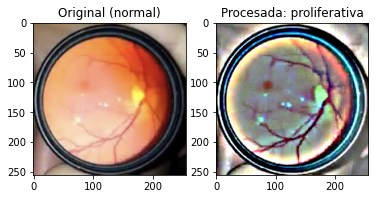

In [12]:
imatge = cv2.imread('/Users/lcasanova/Desktop/UOC-MCD/TFM/figures/proves_RD_movil/MEO (079) 2.jpeg')
imatge = crop_border(imatge)
imatge = cv2.resize(imatge, (256, 256),interpolation=cv2.INTER_LINEAR)
# Aplicamos GaussianBlur
blurred = cv2.blur(imatge, ksize=(int(256 / 6), int(256 / 6)))
image_blur = cv2.addWeighted(imatge, 4, cv2.GaussianBlur(imatge , (0,0) , 10) ,-4 ,128)
prova_img = modelo_opened.predict(np.reshape(image_blur,[1,256,256,3]))
pred_img_prova = np.argmax(prova_img,axis=1)
if(pred_img_prova == 0):
    pred = 'Sin RD'
if(pred_img_prova == 1):
    pred = 'RD leve'
if(pred_img_prova == 2):
    pred = 'Moderada'
if(pred_img_prova == 3):
    pred = 'Grave'
if(pred_img_prova == 4):
    pred = 'proliferativa'
    
f, axarr = plt.subplots(1,2)
axarr[0].imshow(cv2.cvtColor(imatge, cv2.COLOR_BGR2RGB))
axarr[0].title.set_text("Original (normal)")
axarr[1].imshow(cv2.cvtColor(image_blur, cv2.COLOR_BGR2RGB))
axarr[1].title.set_text(f"Procesada: {pred}")

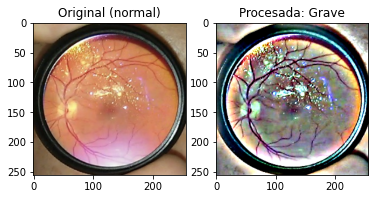

In [13]:
imatge = cv2.imread('/Users/lcasanova/Desktop/UOC-MCD/TFM/figures/proves_RD_movil/2014-11-25 10.52.37.jpeg')
imatge = crop_border(imatge)
imatge = cv2.resize(imatge, (256, 256),interpolation=cv2.INTER_LINEAR)
# Aplicamos GaussianBlur
blurred = cv2.blur(imatge, ksize=(int(256 / 6), int(256 / 6)))
image_blur = cv2.addWeighted(imatge, 4, cv2.GaussianBlur(imatge , (0,0) , 10) ,-4 ,128)
prova_img = modelo_opened.predict(np.reshape(image_blur,[1,256,256,3]))
pred_img_prova = np.argmax(prova_img,axis=1)
if(pred_img_prova == 0):
    pred = 'Sin RD'
if(pred_img_prova == 1):
    pred = 'RD leve'
if(pred_img_prova == 2):
    pred = 'Moderada'
if(pred_img_prova == 3):
    pred = 'Grave'
if(pred_img_prova == 4):
    pred = 'proliferativa'
    
f, axarr = plt.subplots(1,2)
axarr[0].imshow(cv2.cvtColor(imatge, cv2.COLOR_BGR2RGB))
axarr[0].title.set_text("Original (normal)")
axarr[1].imshow(cv2.cvtColor(image_blur, cv2.COLOR_BGR2RGB))
axarr[1].title.set_text(f"Procesada: {pred}")

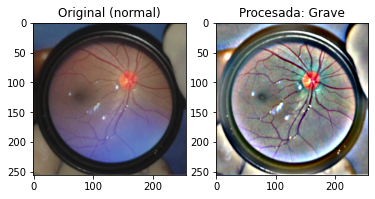

In [14]:
imatge = cv2.imread('/Users/lcasanova/Desktop/UOC-MCD/TFM/figures/proves_RD_movil/fondoscopia-imagen-de-oftalmoscopia-indirecta-dr-luis-ignacio-larrazabal-aguerrevere-300x294-1.png')
imatge = crop_border(imatge)
imatge = cv2.resize(imatge, (256, 256),interpolation=cv2.INTER_LINEAR)
# Aplicamos GaussianBlur
blurred = cv2.blur(imatge, ksize=(int(256 / 6), int(256 / 6)))
image_blur = cv2.addWeighted(imatge, 4, cv2.GaussianBlur(imatge , (0,0) , 10) ,-4 ,128)
prova_img = modelo_opened.predict(np.reshape(image_blur,[1,256,256,3]))
pred_img_prova = np.argmax(prova_img,axis=1)
if(pred_img_prova == 0):
    pred = 'Sin RD'
if(pred_img_prova == 1):
    pred = 'RD leve'
if(pred_img_prova == 2):
    pred = 'Moderada'
if(pred_img_prova == 3):
    pred = 'Grave'
if(pred_img_prova == 4):
    pred = 'proliferativa'
    
f, axarr = plt.subplots(1,2)
axarr[0].imshow(cv2.cvtColor(imatge, cv2.COLOR_BGR2RGB))
axarr[0].title.set_text("Original (normal)")
axarr[1].imshow(cv2.cvtColor(image_blur, cv2.COLOR_BGR2RGB))
axarr[1].title.set_text(f"Procesada: {pred}")

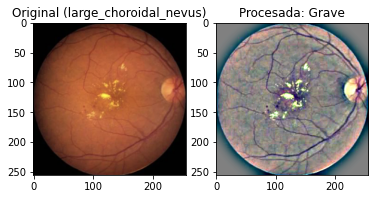

In [16]:
imatge = cv2.imread('/Users/lcasanova/Desktop/UOC-MCD/TFM/figures/proves_RD_movil/mild.png')
imatge = crop_border(imatge)
imatge = cv2.resize(imatge, (256, 256),interpolation=cv2.INTER_LINEAR)
# Aplicamos GaussianBlur
blurred = cv2.blur(imatge, ksize=(int(256 / 6), int(256 / 6)))
image_blur = cv2.addWeighted(imatge, 4, cv2.GaussianBlur(imatge , (0,0) , 10) ,-4 ,128)
prova_img = modelo_opened.predict(np.reshape(image_blur,[1,256,256,3]))
pred_img_prova = np.argmax(prova_img,axis=1)
if(pred_img_prova == 0):
    pred = 'Sin RD'
if(pred_img_prova == 1):
    pred = 'RD leve'
if(pred_img_prova == 2):
    pred = 'Moderada'
if(pred_img_prova == 3):
    pred = 'Grave'
if(pred_img_prova == 4):
    pred = 'proliferativa'
    
f, axarr = plt.subplots(1,2)
axarr[0].imshow(cv2.cvtColor(imatge, cv2.COLOR_BGR2RGB))
axarr[0].title.set_text("Original (large_choroidal_nevus)")
axarr[1].imshow(cv2.cvtColor(image_blur, cv2.COLOR_BGR2RGB))
axarr[1].title.set_text(f"Procesada: {pred}")

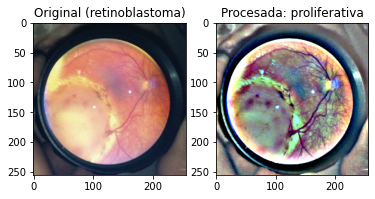

In [18]:
imatge = cv2.imread('/Users/lcasanova/Desktop/UOC-MCD/TFM/figures/proves_RD_movil/retinoblastoma.png')
imatge = crop_border(imatge)
imatge = cv2.resize(imatge, (256, 256),interpolation=cv2.INTER_LINEAR)
# Aplicamos GaussianBlur
blurred = cv2.blur(imatge, ksize=(int(256 / 6), int(256 / 6)))
image_blur = cv2.addWeighted(imatge, 4, cv2.GaussianBlur(imatge , (0,0) , 10) ,-4 ,128)
prova_img = modelo_opened.predict(np.reshape(image_blur,[1,256,256,3]))
pred_img_prova = np.argmax(prova_img,axis=1)
if(pred_img_prova == 0):
    pred = 'Sin RD'
if(pred_img_prova == 1):
    pred = 'RD leve'
if(pred_img_prova == 2):
    pred = 'Moderada'
if(pred_img_prova == 3):
    pred = 'Grave'
if(pred_img_prova == 4):
    pred = 'proliferativa'
    
f, axarr = plt.subplots(1,2)
axarr[0].imshow(cv2.cvtColor(imatge, cv2.COLOR_BGR2RGB))
axarr[0].title.set_text("Original (retinoblastoma)")
axarr[1].imshow(cv2.cvtColor(image_blur, cv2.COLOR_BGR2RGB))
axarr[1].title.set_text(f"Procesada: {pred}")

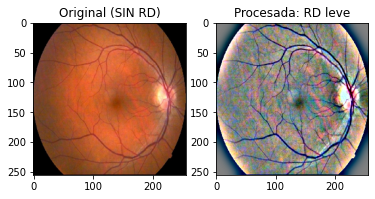

In [27]:
imatge = cv2.imread('/Users/lcasanova/Desktop/UOC-MCD/TFM/figures/proves_RD_movil/normal.jpeg')
imatge = crop_border(imatge)
imatge = cv2.resize(imatge, (256, 256),interpolation=cv2.INTER_LINEAR)
# Aplicamos GaussianBlur
blurred = cv2.blur(imatge, ksize=(int(256 / 6), int(256 / 6)))
image_blur = cv2.addWeighted(imatge, 4, cv2.GaussianBlur(imatge , (0,0) , 10) ,-4 ,128)
prova_img = modelo_opened.predict(np.reshape(image_blur,[1,256,256,3]))
pred_img_prova = np.argmax(prova_img,axis=1)
if(pred_img_prova == 0):
    pred = 'Sin RD'
if(pred_img_prova == 1):
    pred = 'RD leve'
if(pred_img_prova == 2):
    pred = 'Moderada'
if(pred_img_prova == 3):
    pred = 'Grave'
if(pred_img_prova == 4):
    pred = 'proliferativa'
    
f, axarr = plt.subplots(1,2)
axarr[0].imshow(cv2.cvtColor(imatge, cv2.COLOR_BGR2RGB))
axarr[0].title.set_text("Original (SIN RD)")
axarr[1].imshow(cv2.cvtColor(image_blur, cv2.COLOR_BGR2RGB))
axarr[1].title.set_text(f"Procesada: {pred}")

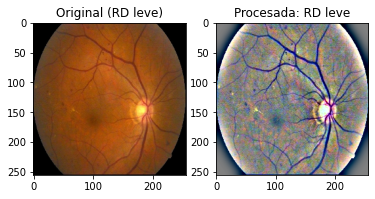

In [26]:
imatge = cv2.imread('/Users/lcasanova/Desktop/UOC-MCD/TFM/figures/proves_RD_movil/leve.jpeg')
imatge = crop_border(imatge)
imatge = cv2.resize(imatge, (256, 256),interpolation=cv2.INTER_LINEAR)
# Aplicamos GaussianBlur
blurred = cv2.blur(imatge, ksize=(int(256 / 6), int(256 / 6)))
image_blur = cv2.addWeighted(imatge, 4, cv2.GaussianBlur(imatge , (0,0) , 10) ,-4 ,128)
prova_img = modelo_opened.predict(np.reshape(image_blur,[1,256,256,3]))
pred_img_prova = np.argmax(prova_img,axis=1)
if(pred_img_prova == 0):
    pred = 'Sin RD'
if(pred_img_prova == 1):
    pred = 'RD leve'
if(pred_img_prova == 2):
    pred = 'Moderada'
if(pred_img_prova == 3):
    pred = 'Grave'
if(pred_img_prova == 4):
    pred = 'proliferativa'
    
f, axarr = plt.subplots(1,2)
axarr[0].imshow(cv2.cvtColor(imatge, cv2.COLOR_BGR2RGB))
axarr[0].title.set_text("Original (RD leve)")
axarr[1].imshow(cv2.cvtColor(image_blur, cv2.COLOR_BGR2RGB))
axarr[1].title.set_text(f"Procesada: {pred}")

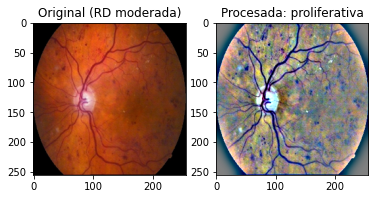

In [25]:
imatge = cv2.imread('/Users/lcasanova/Desktop/UOC-MCD/TFM/figures/proves_RD_movil/moderada.jpeg')
imatge = crop_border(imatge)
imatge = cv2.resize(imatge, (256, 256),interpolation=cv2.INTER_LINEAR)
# Aplicamos GaussianBlur
blurred = cv2.blur(imatge, ksize=(int(256 / 6), int(256 / 6)))
image_blur = cv2.addWeighted(imatge, 4, cv2.GaussianBlur(imatge , (0,0) , 10) ,-4 ,128)
prova_img = modelo_opened.predict(np.reshape(image_blur,[1,256,256,3]))
pred_img_prova = np.argmax(prova_img,axis=1)
if(pred_img_prova == 0):
    pred = 'Sin RD'
if(pred_img_prova == 1):
    pred = 'RD leve'
if(pred_img_prova == 2):
    pred = 'Moderada'
if(pred_img_prova == 3):
    pred = 'Grave'
if(pred_img_prova == 4):
    pred = 'proliferativa'
    
f, axarr = plt.subplots(1,2)
axarr[0].imshow(cv2.cvtColor(imatge, cv2.COLOR_BGR2RGB))
axarr[0].title.set_text("Original (RD moderada)")
axarr[1].imshow(cv2.cvtColor(image_blur, cv2.COLOR_BGR2RGB))
axarr[1].title.set_text(f"Procesada: {pred}")

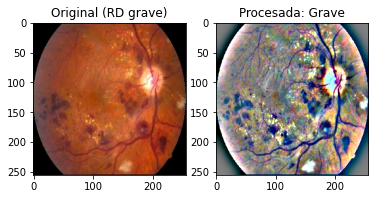

In [24]:
imatge = cv2.imread('/Users/lcasanova/Desktop/UOC-MCD/TFM/figures/proves_RD_movil/severa.jpeg')
imatge = crop_border(imatge)
imatge = cv2.resize(imatge, (256, 256),interpolation=cv2.INTER_LINEAR)
# Aplicamos GaussianBlur
blurred = cv2.blur(imatge, ksize=(int(256 / 6), int(256 / 6)))
image_blur = cv2.addWeighted(imatge, 4, cv2.GaussianBlur(imatge , (0,0) , 10) ,-4 ,128)
prova_img = modelo_opened.predict(np.reshape(image_blur,[1,256,256,3]))
pred_img_prova = np.argmax(prova_img,axis=1)
if(pred_img_prova == 0):
    pred = 'Sin RD'
if(pred_img_prova == 1):
    pred = 'RD leve'
if(pred_img_prova == 2):
    pred = 'Moderada'
if(pred_img_prova == 3):
    pred = 'Grave'
if(pred_img_prova == 4):
    pred = 'proliferativa'
    
f, axarr = plt.subplots(1,2)
axarr[0].imshow(cv2.cvtColor(imatge, cv2.COLOR_BGR2RGB))
axarr[0].title.set_text("Original (RD grave)")
axarr[1].imshow(cv2.cvtColor(image_blur, cv2.COLOR_BGR2RGB))
axarr[1].title.set_text(f"Procesada: {pred}")